In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
##download small portion data from https://storage.googleapis.com/books/ngrams/books/datasetsv2.html
df = pd.read_table('googlebooks-eng-all-1gram-20120701-a.tsv',delim_whitespace=True,header = None)


In [3]:
df.dtypes

0    object
1     int64
2     int64
3     int64
dtype: object

In [4]:
df.columns = ["token", "year", 'match_count', "volum_count"]

In [5]:
df.astype({'token': 'str'}).dtypes

token          object
year            int64
match_count     int64
volum_count     int64
dtype: object

In [6]:
df.head()

,token,year,match_count,volum_count
0,A'Aang_NOUN,1879,45,5
1,A'Aang_NOUN,1882,5,4
2,A'Aang_NOUN,1885,1,1
3,A'Aang_NOUN,1891,1,1
4,A'Aang_NOUN,1899,20,4


In [7]:
##eliminate the type of the word
##ex. A'Aang_Noun will be A'Aang
def clean_token_helper(token):
    try:
        ind = token.index('_')
        return token[:ind]
    except:
        return token

#df_no_type = df['token'].apply(lambda x: clean_token_helper(x))

In [8]:
df['token'] =  df['token'].apply(lambda x: clean_token_helper(x))
df.head()

,token,year,match_count,volum_count
0,A'Aang,1879,45,5
1,A'Aang,1882,5,4
2,A'Aang,1885,1,1
3,A'Aang,1891,1,1
4,A'Aang,1899,20,4


In [9]:
def year_helper(year):
    if year < 1800:
        return 0
    elif year < 1850:
        return 1
    elif year < 1900:
        return 2
    elif year < 1930:
        return 3
    elif year < 1970:
        return 4
    elif year < 2000:
        return 5
    else:
        return 6
df['year_index'] = df['year'].apply(lambda x: year_helper(x))

In [10]:
no_year = df.drop(['year'],axis = 1)

In [11]:
no_year = no_year.groupby(['token','year_index'],sort=False).sum().reset_index()

In [12]:
no_year.head(10)

,token,year_index,match_count,volum_count
0,A'Aang,2,181,34
1,A'Aang,3,9,3
2,A'Aang,4,159,53
3,A'Aang,5,35,7
4,A'Aang,6,8,4
5,A'que,1,7,5
6,A'que,2,177,165
7,A'que,3,70,70
8,A'que,4,8,8
9,A'que,6,8,6


In [13]:
no_year['val'] = no_year['match_count']/no_year['volum_count']

In [14]:
no_year.head()

,token,year_index,match_count,volum_count,val
0,A'Aang,2,181,34,5.323529
1,A'Aang,3,9,3,3.000000
2,A'Aang,4,159,53,3.000000
3,A'Aang,5,35,7,5.000000
4,A'Aang,6,8,4,2.000000


In [66]:
no_year.fillna(0, inplace=True)
table = no_year.pivot_table(index = 'token', columns='year_index', values='val')

In [67]:
table.fillna(0, inplace = True)

In [68]:
table['sum'] = table[0]+table[1]+table[2]+table[3]+table[4]+table[5]+table[6]
table = table.sort_values(by='sum',ascending = False)

In [75]:
table_200 = table.iloc[100:300]

In [76]:
table_200

year_index,0,1,2,3,4,5,6,sum
token,,,,,,,,
American,8.584291,16.860213,19.343313,27.013344,38.054732,36.355809,34.167791,180.379494
Asantes,0.000000,0.000000,144.000000,2.000000,21.294118,6.823964,5.452915,179.570997
äs,1.777778,1.210526,61.121622,20.539062,50.344743,27.444056,15.735294,178.173082
Act,12.403916,11.856267,26.228740,31.846415,40.003419,30.662872,24.720878,177.722506
Alonville,104.714286,1.000000,1.100000,1.750000,5.125000,8.916667,54.761905,177.367857
...,...,...,...,...,...,...,...,...
Amorest,0.000000,0.000000,1.988791,122.899480,5.218906,5.134461,2.714286,108.117063
Armanti,0.000000,2.402820,0.000000,1.265374,1.794124,2.495918,103.175676,108.104597
Anhulwarra,0.000000,45.653588,11.164348,22.650200,14.640049,73.340383,10.550000,107.915488


In [77]:
for i in range(7):
    table_200[i] = table_200[i]*(sum(table_200[6]))/(sum(table_200[i]))
    print((sum(table_200[6])))
    

5243.010238132925
5243.010238132925
5243.010238132925
5243.010238132925
5243.010238132925
5243.010238132925
5243.010238132925


/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
table_200

year_index,0,1,2,3,4,5,6,sum
token,,,,,,,,
American,10.844585,18.705648,22.337295,26.056716,38.484156,39.444811,34.167791,180.379494
Asantes,0.000000,0.000000,166.288503,1.929174,21.534408,7.403768,5.452915,179.570997
äs,2.245877,1.343024,70.582104,19.811709,50.912851,29.775863,15.735294,178.173082
Act,15.669938,13.153995,30.288457,30.718632,40.454832,33.268168,24.720878,177.722506
Alonville,132.286161,1.109455,1.270259,1.688027,5.182832,9.674279,54.761905,177.367857
...,...,...,...,...,...,...,...,...
Amorest,0.000000,0.000000,2.296618,118.547220,5.277798,5.570714,2.714286,108.117063
Armanti,0.000000,2.665821,0.000000,1.220563,1.814369,2.707986,103.175676,108.104597
Anhulwarra,0.000000,50.650602,12.892380,21.848085,14.805253,79.571810,10.550000,107.915488


In [79]:
s = "I would always rather be happy than dignified.” “There is no happiness like that of being loved by your fellow-creatures, and feeling that your presence is an addition to their comfort."
slist = s.split()
score = np.zeros(7)
for w in s.split():
    ws = np.zeros(7)
    try:
        ws = np.array(table_200.loc[w])[:7]
    except:
        continue
    score = score+ws
print(score)
print(np.argmax(score))

[0. 0. 0. 0. 0. 0. 0.]
0


In [13]:
df.describe()

,year,match_count,volum_count,year_index
count,8.661850e+07,8.661850e+07,8.661850e+07,8.661850e+07
mean,1.936932e+03,1.018027e+03,6.159865e+01,3.788960e+00
std,6.677653e+01,2.529445e+05,1.122952e+03,1.651103e+00
min,1.505000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.900000e+03,1.000000e+00,1.000000e+00,3.000000e+00
50%,1.961000e+03,3.000000e+00,2.000000e+00,4.000000e+00
75%,1.988000e+03,9.000000e+00,6.000000e+00,5.000000e+00
max,2.008000e+03,4.708256e+08,2.062570e+05,6.000000e+00


In [40]:
##some words are too old, make a dictionary for each year from 1800 to 2008
year_dict = {}
for i in range(1800,2009):
    year_dict[i] = df[df['year'] == i]


In [45]:
h =  year_dict[2008]['match_count']

In [101]:
##a simple plot function for several words
##elaborate on a it
##similar to https://books.google.com/ngrams/
def plot_word(df,word):
    for w in word:
        res = df[df['token'] == w]
        year = list(set(res['year'].to_numpy()))
        count = res.groupby(['year']).sum()['match_count'].to_numpy()
        #plt.figure()
        plt.plot(year,np.log(count),label=w)
        
        plt.xlabel = "year"
        plt.ylabel = "count"
    #plt.legend(w,loc = 4)
    plt.show()
    return 1
    

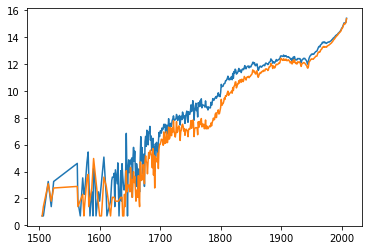

In [102]:
tmp = plot_word(df,["answer",'ask'])

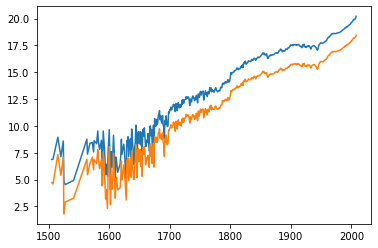

1

In [104]:
plot_word(df,['a','an'])